In [1]:
from numpy import *
import matplotlib.pyplot as plt
from LRFutils import archive, log
from LRFutils.color import Color

import Pupil

---
# Config

In [2]:
# Image size (in pixels)
N = 500

# Pupil radius (in pixels)
pupil_radius = N/3

# Obstruction radius (in pixels)
obstruction_radius = N/9

# Arms
arms_count = 3

# Arms size (in pixels)
arms_size = 10

# Arms angle (in radians)
arms_angle = 0

---
# Script

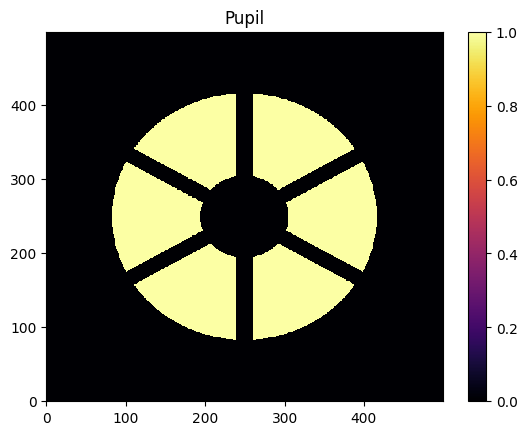

In [3]:
pupil = Pupil.create(N, pupil_radius, obstruction_radius, arms_count, arms_size, arms_angle)

plt.pcolor(range(N),range(N),pupil, shading='auto', cmap="inferno")
plt.colorbar()
plt.title("Pupil")
plt.show()